In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns 

In [2]:
df = pd.read_csv("C:\Datasets\Titanic-Dataset.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Vishaal\AppData\Local\Temp\ipykernel_19200\3276383157.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("C:\Datasets\Titanic-Dataset.csv")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(["PassengerId","Name","Ticket","Cabin","Embarked"],axis=1,inplace=True)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [5]:
df["Sex"] = df['Sex'].map({"male":1,"female":0})

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


In [10]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.634454,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

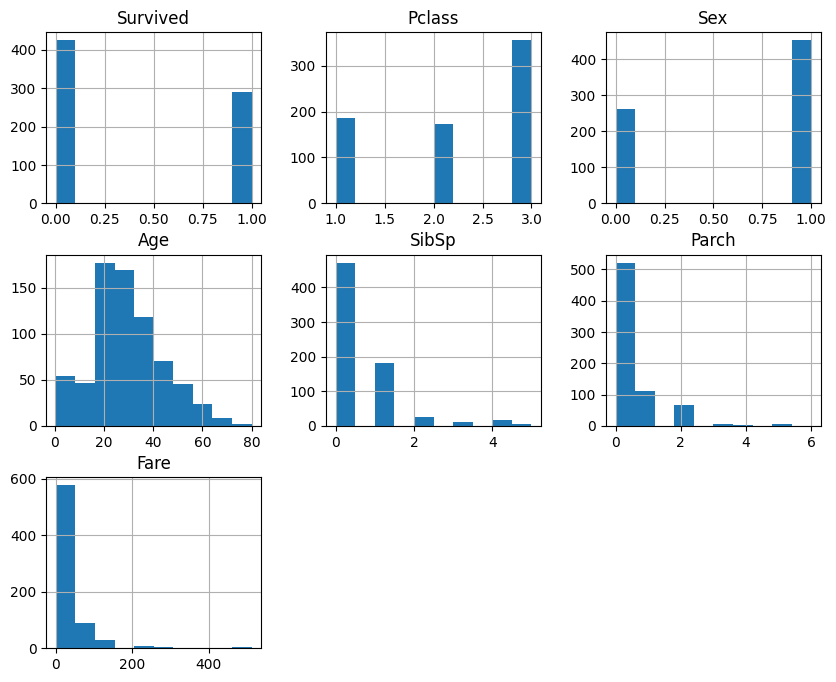

In [11]:
df.hist(figsize=[10,8])

In [12]:
def outliers(column_name):
    Q1 = df[column_name].quantile(0.25)
    Q2 = df[column_name].quantile(0.5)
    Q3 = df[column_name].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    print(f"lower bound: {lower_bound}, upper bound: {upper_bound}")
    print("total outliers: ",outliers.shape[0])
    # df1[column_name] = df1[column_name].clip(lower=lower_bound, upper=upper_bound)
    sns.boxplot(df[column_name])

lower bound: -29.937499999999996, upper bound: 71.3625
total outliers:  94


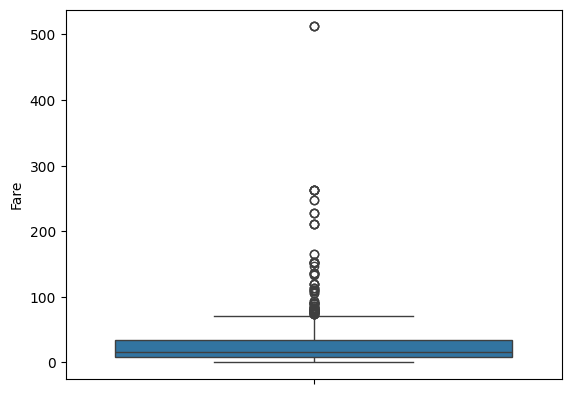

In [13]:
outliers("Fare")

lower bound: -6.6875, upper bound: 64.8125
total outliers:  11


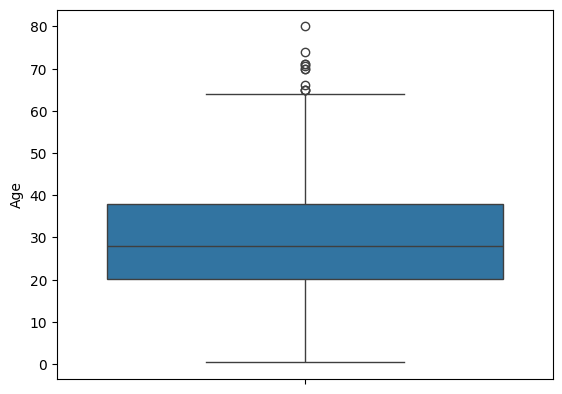

In [14]:
outliers("Age")

<Axes: >

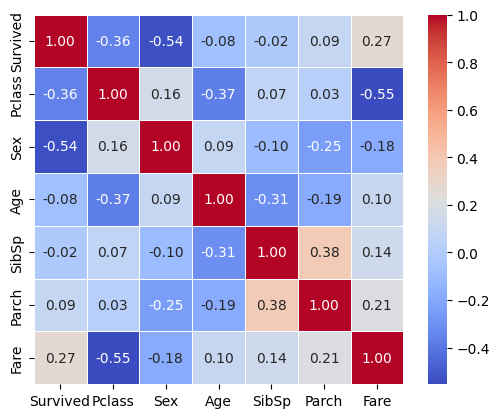

In [15]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5,square=True)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [17]:
X = df.drop("Survived",axis=1)
y = df["Survived"]

In [18]:
print(X.shape, y.shape)

(714, 6) (714,)


In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [21]:
y_pred = model.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7482517482517482
[[71 16]
 [20 36]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        87
           1       0.69      0.64      0.67        56

    accuracy                           0.75       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143



In [25]:
user = [1, 0, 38.0, 1, 0, 71.2833]

columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

user_df = pd.DataFrame([user], columns=columns)

prediction = model.predict(user_df)

if prediction[0] == 1:
    print("The person survived.")
else:
    print("The person did not survive.")

The person survived.


In [24]:
import pickle

with open('titanic_survival.pkl', 'wb') as f:
    pickle.dump(model, f)